## Popular Data Science Questions
As the name of project, it clearly specify that we are going to find the answer of this question "What is it that people want to learn about in data science?". For that we are going to use the popular Question/Answer platform Stack Exchange.

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. Some of the popular sites are Stack Overflow, Ask Ubuntu, Unix & Linux etc.
<br/>
<br/>
Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Being a multidisciplinary field, there a few Stack Exchange websites that are relevant to our goal here:

- [Data Science](https://datascience.stackexchange.com/)
- Cross Validated — a statistics site
- [Artificial Intelligence](https://ai.stackexchange.com/)
- Mathematics
- [Stack Overflow](https://stackoverflow.com/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

One good thing is that we don't have to scrape data from the site because Stack Exchange provides a public data base for each of its websites (Stack Exchange Data Explorer (SEDE)). Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and explore Data Science Stack Exchange's database.

The posts table has a lot of columns but we will be focusing our attention on those that seem relevant towards our goal:

- **Id:** An identification number for the post.
- **PostTypeId:** An identification number for the type of post.
- **CreationDate:** The date and time of creation of the post.
- **Score:** The post's score.
- **ViewCount:** How many times the post was viewed.
- **Tags:** What tags were used.
- **AnswerCount:** How many answers the question got (only applicable to question posts).
- **FavoriteCount:** How many times the question was favored (only applicable to question posts).

In [2]:
data = pd.read_csv('2019_questions.csv')

In [3]:
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


As we can see that, `CreationDate` column is of object type we convert it into datetime format and `Tags` column have need some cleaning. Also `FavoriteCount` column contains more than 80 percent data NaN (null) replace it with 0.

In [5]:
data['FavoriteCount'] = data['FavoriteCount'].fillna(0)
data['FavoriteCount'] = data['FavoriteCount'].astype(int)
data['FavoriteCount'].value_counts()

0     7607
1      953
2      205
3       43
4       12
5        8
7        4
6        4
11       1
16       1
8        1
Name: FavoriteCount, dtype: int64

In [6]:
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

In [7]:
import re
def clean(tag):
    lst = re.split('[<>]', tag)
    return([each for each in lst if each != ''])

data['Tags'] = data['Tags'].apply(clean)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [8]:
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


So, now we are going to focus on determining the most popular tags, i.e. for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [9]:
distinct_tag = {}
for tags in data['Tags']:
    for each in tags:
        if each not in distinct_tag:
            distinct_tag[each] = 1
        else:
            distinct_tag[each] += 1
print(len(distinct_tag))

526


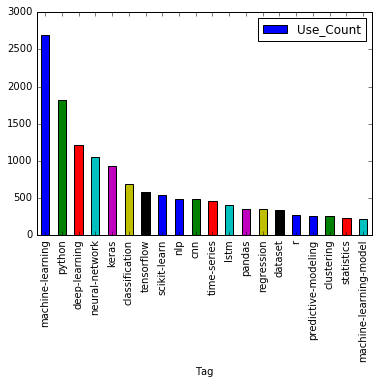

In [10]:
x_value = []
y_value = []
for key, value in distinct_tag.items():
    x_value.append(key)
    y_value.append(value)
    
df = pd.DataFrame(list(zip(x_value, y_value)), 
               columns =['Tag', 'Use_Count'])
sort_df = df.sort_values('Use_Count', ascending=False)
sort_df[:20].plot.bar(x='Tag', y='Use_Count')

In [11]:
sort_df.head(10)

,Tag,Use_Count
435,machine-learning,2693
456,python,1814
195,deep-learning,1220
379,neural-network,1055
211,keras,935
128,classification,685
497,tensorflow,584
294,scikit-learn,540
460,nlp,493
194,cnn,489


So, let's count the views of top 10 most used tags.

In [12]:
def view_count(tag):
    count = 0
    for index, row in data.iterrows():
        tags = row['Tags']
        if tag in tags:
            count += row['ViewCount']
    return count

In [13]:
top_10_tags = [row['Tag'] for index, row in sort_df[:10].iterrows()]
print('Tag:\t','View_Count')
for tag in top_10_tags:
    print(tag,':\t',view_count(tag))

Tag:	 View_Count
machine-learning :	 388499
python :	 537585
deep-learning :	 233628
neural-network :	 185367
keras :	 268608
classification :	 104457
tensorflow :	 121369
scikit-learn :	 128110
nlp :	 71382
cnn :	 70349


We can also do some further research such as total number of questions asked in particular track in some time invertal or which tag or track is famous in given time period. We can take data from stack exchange public data base by writing some `SQL` query.

Let's Check the Deep Learning Track popularity in year 2019.

In [14]:
dp = pd.read_csv('all_questions.csv')
dp.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [15]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null object
Tags            21576 non-null object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


In [16]:
dp['CreationDate'] = pd.to_datetime(dp['CreationDate'])
dp['Tags'] = dp['Tags'].apply(clean)
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [17]:
print(dp.shape)
dp.head()

(21576, 3)


,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [18]:
years = []
for index, row in dp.iterrows():
    year = row['CreationDate'].year
    if year not in years:
        years.append(year)
print(years)

[2019, 2014, 2018, 2017, 2016, 2015, 2020]


In [19]:
count = 0
for index, row in dp.iterrows():
    tag = 'deep-learning'
    if tag in row['Tags']:
        count += 1
print('Total questions asked with tag Deep Learning:\t', count)

Total questions asked with tag Deep Learning:	 2805
